In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
import warnings
warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')

df.dropna(subset=['age','embarked'],inplace=True)

#converting categorical variables to dummy variables
df = pd.get_dummies(df, columns=['sex','embarked','class','who','deck'], drop_first=True)

# selecting x and y
x = df.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = df['survived']

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#building the model
input = tf.keras.layers.Dense(10, activation='relu', input_shape=[x_train.shape[1]])
output = tf.keras.layers.Dense(1, activation='sigmoid')
model = tf.keras.models.Sequential([input, output])

model.compile(      optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                    )





In [4]:
# Training the model
model.fit(x_train,y_train, epochs=3, batch_size=32, verbose=1)


Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4962 - loss: 0.7564
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6412 - loss: 0.7046
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.6666


In [5]:
# evaluate the model
loss , accuracy = model.evaluate(x_test, y_test, verbose=1)
print("the loss of the test model: ",loss)
print("the accuracy of the test model: ",accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6946 - loss: 0.6472  
the loss of the test model:  0.6580591201782227
the accuracy of the test model:  0.6853147149085999


In [6]:
import sys
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.19045-SP0
Tensor Flow Version: 2.16.1

Python 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]
Pandas 2.2.1
Scikit-Learn 1.4.1.post1
SciPy 1.12.0
GPU is NOT AVAILABLE


# Multi-Layer perceptron

In [7]:

import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



tips = sns.load_dataset('tips')

tips = pd.get_dummies(tips, drop_first=True)

x = tips.drop('tip', axis=1)
y = tips['tip']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]), # input layer
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test, y_test))


loss, mae = model.evaluate(x_test, y_test, verbose=1)
print("the loss of the test model: ",loss)
print("the accuracy of the test model: ",mae)






Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 11.4216 - mae: 3.1172 - val_loss: 6.8074 - val_mae: 2.4649
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.5755 - mae: 2.7600 - val_loss: 5.5123 - val_mae: 2.1779
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8962 - mae: 2.5871 - val_loss: 4.3836 - val_mae: 1.8903
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.9348 - mae: 2.2398 - val_loss: 3.3654 - val_mae: 1.5917
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.4230 - mae: 1.9457 - val_loss: 2.4805 - val_mae: 1.3091
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.4866 - mae: 1.6763 - val_loss: 1.7807 - val_mae: 1.0890
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3381 - mae: 1.5450 - val_loss: 1.3273 - val_mae: 0.9540
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7052 - mae: 1.2157 - val_loss: 1.1607 - val_mae: 0.8939
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.7272 - mae: 0.9545 -

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0366 - mae: 0.8461 
_______________________________________________________________
the loss of the test model:  0.9332761764526367
_______________________________________________________________
the accuracy of the test model:  0.83116614818573
_______________________________________________________________
the validation loss [6.807370185852051, 5.512341022491455, 4.383578777313232, 3.365403652191162, 2.480527400970459, 1.7807016372680664, 1.327272891998291, 1.1606998443603516, 1.1496214866638184, 1.2498054504394531, 1.29925537109375, 1.2723305225372314, 1.1924875974655151, 1.1138551235198975, 1.0699292421340942, 1.075681447982788, 1.0282756090164185, 1.0011242628097534, 0.9733120203018188, 0.9951698184013367, 1.0316977500915527, 0.9632846117019653, 0.9184346199035645, 0.9127247333526611, 0.954617977142334, 0.9939515590667725, 0.949514627456665, 0.8798511028289795, 0.885581374168396, 0.8944857716560364, 0.8815066814422607, 1.03068876266

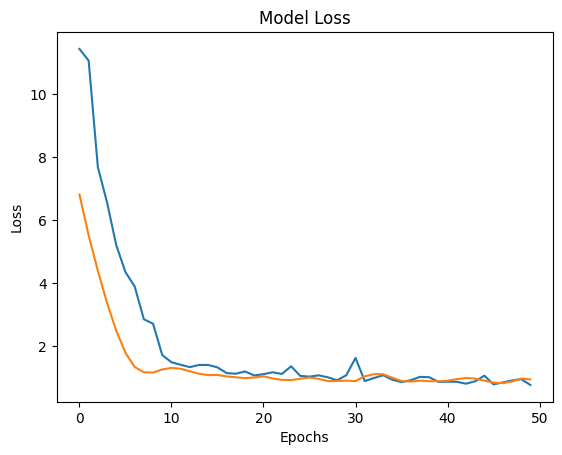

In [8]:
loss, mae = model.evaluate(x_test, y_test, verbose=1)

print("_______________________________________________________________")
print("the loss of the test model: ",loss)
print("_______________________________________________________________")
print("the accuracy of the test model: ",mae)
print("_______________________________________________________________")
print("the validation loss",history.history['val_loss'])
print("_______________________________________________________________")
import matplotlib.pyplot as plt

# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Early stopping epochs if it's not improving more

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 8.6097 - mae: 2.6110 - val_loss: 4.6632 - val_mae: 1.9444
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7885 - mae: 2.3305 - val_loss: 3.5433 - val_mae: 1.6238
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3617 - mae: 1.9773 - val_loss: 2.6224 - val_mae: 1.3624
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.0304 - mae: 1.5551 - val_loss: 1.9607 - val_mae: 1.1418
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9154 - mae: 1.4831 - val_loss: 1.5494 - val_mae: 1.0132
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.2167 - mae: 1.3001 - val_loss: 1.3408 - val_mae: 0.9444
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2.4911 - mae: 1.1755 - val_loss: 1.2719 - val_mae: 0.9198
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.5788 - mae: 1.0232 - val_loss: 1.2478 - val_mae: 0.9284
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.4474 - mae: 0.9532 - 

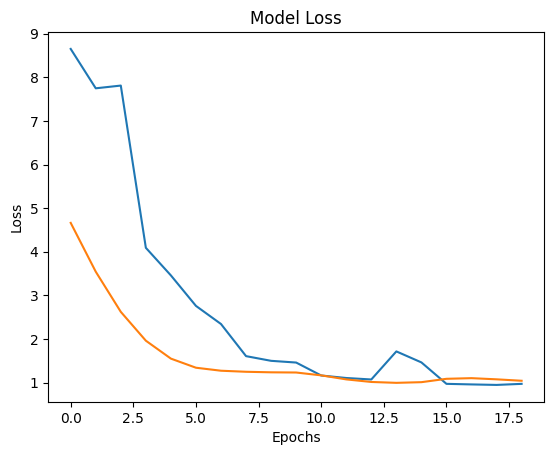

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]), # input layer
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# defining the call back function
early_stopping = EarlyStopping(patience=5)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1,
                     validation_data=(x_test, y_test),
                       callbacks=[early_stopping])

loss, mae = model.evaluate(x_test, y_test, verbose=1)


print("the loss of the test model: ",loss)
print("the accuracy of the test model: ",mae)

# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

